In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
from IPython.display import display, Math, Latex
%matplotlib inline

Для выполенения задания я решил взять Гамма-распределение с параметрами: k = 2, тета = 1

Следует сказать, что один из параметров второй параметр менять нельзя (он уже по умолчанию встроен в библиотеку Python'a и равен 1).

Ок. Давайте для начала сгенерируем выборку из 1000 элементов для Гамма-распределения,
а затем построим гистограмму выборки и график плотности. Код для этого представлен 
ниже.

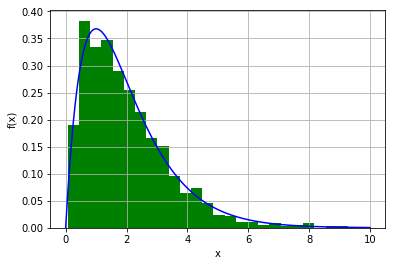

In [2]:
k = 2
gamma_dist = sts.gamma(k)

sample_data = gamma_dist.rvs(size=1000)

x = np.linspace(0, 10, 1000)
pdf = [gamma_dist.pdf(x_) for x_ in x]

plt.hist(sample_data, 25, normed=True, facecolor='green')
plt.plot(x, pdf, c="blue")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

Замечательно. Давайте двигаться дальше. Выпишем формулы для вычисления параметров Гамма-распределения при заданных параметрах:

Матожидание: 2

Дисперсия: 2

Функция, вычисляющая данные параметры, представлена ниже.

In [3]:
def calculate_mu_and_sigma(k=2, theta=1):
    m = k * theta
    s = sqrt(k * (theta ** 2))
    return m, s   

Следующая функция генерирует выборку средних, вычисляет теоретичские матожидание и стандартное отклонение, а затем строит гистограмму средних и нормального распределения, используя теоретические параметрами для математического ожидания и стандартного отклонения.

In [4]:
def do_clt(sample, sub_sample_size, number_of_sample):
    sample_of_means = []
    for i in range(0, number_of_sample):
        sub_sample_indexes = np.random.randint(0, len(sample), sub_sample_size)
        sub_sample = sample[sub_sample_indexes]
        sample_of_means.append(np.mean(sub_sample))
    
    mu_n = np.mean(sample_of_means) # приближенное матожидание
    sigma_n = np.std(sample_of_means, ddof=1) # приближенное стандартное отклонение
    
    mu, sigma = calculate_mu_and_sigma(2)
    norm_dist = sts.norm(mu, sigma / sqrt(sub_sample_size))
    
    x = np.linspace(0, 10, 1000)
    pdf = [norm_dist.pdf(x_) for x_ in x]
    
    plt.hist(sample_of_means, 50, normed=True, facecolor='green',)
    plt.plot(x, pdf, c="blue")
    plt.grid(True)
    plt.xlabel("x")    
    plt.ylabel("f(x)")
    plt.axis([0, 4, 0, 2.5])
    return 

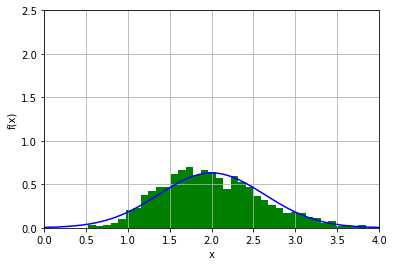

In [5]:
do_clt(sample_data, 5, 1000)

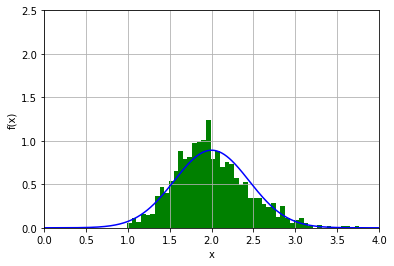

In [6]:
do_clt(sample_data, 10, 1000)

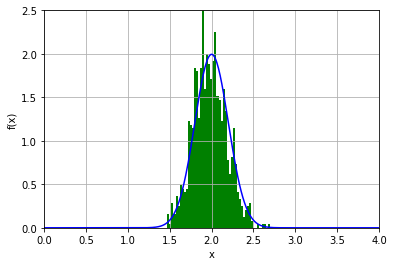

In [7]:
do_clt(sample_data, 50, 1000)

Из графиков видно, что центральная предельная теорема рабоетает. Даже при маленьком размере выбрки (n = 5) среднее приближается неплохо, а с увеличением "n" точность еще больше возрастает.